**IMPORT LIBRARIES**

In [ ]:
import pandas as pd #read data
import numpy as np #process data
import matplotlib.pyplot as plt #plot
from sklearn.preprocessing import MinMaxScaler #standardize data
from keras.callbacks import ModelCheckpoint #save trained model
from tensorflow.keras.models import load_model #download mdoel

#layers to build the model
from keras.layers import SimpleRNN
from keras.models import Sequential #input
from keras.layers import LSTM #dependent learning
from keras.layers import Dropout #avoid overfitting
from keras.layers import Dense #output

#check model accuracy
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score #measures relevance
from sklearn.metrics import mean_absolute_error #measures the average absolute errormeasures the average absolute error
from sklearn.metrics import mean_absolute_percentage_error #measure the average % absolute error

**READ DATA**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving anz2016-2023.csv to anz2016-2023.csv


In [ ]:
df = pd.read_csv('anz2016-2023.csv')
print(df)

            Date       Open       High        Low      Close  Adj Close  \
0     2016-01-04  27.870001  27.879999  27.440001  27.530001  18.387634   
1     2016-01-05  27.389999  27.400000  26.959999  27.070000  18.080395   
2     2016-01-06  27.139999  27.200001  26.549999  26.709999  17.839947   
3     2016-01-07  26.660000  26.680000  25.639999  25.860001  17.272221   
4     2016-01-08  25.500000  26.059999  25.200001  25.540001  17.058491   
...          ...        ...        ...        ...        ...        ...   
1981  2023-10-31  24.790001  24.860001  24.600000  24.709999  24.709999   
1982  2023-11-01  24.830000  24.889999  24.600000  24.870001  24.870001   
1983  2023-11-02  25.270000  25.540001  25.230000  25.370001  25.370001   
1984  2023-11-03  25.730000  25.750000  25.559999  25.600000  25.600000   
1985  2023-11-03  25.730000  25.750000  25.559999  25.600000  25.600000   

       Volume  
0     4347886  
1     5347674  
2     4515679  
3     8281192  
4     8895669  
...

In [ ]:
#data size
df.shape
#data first 5 lines
df.head()
#define data type
df.info()
#describe the dataset
df.describe()
#check for null values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1986 non-null   object 
 1   Open       1986 non-null   float64
 2   High       1986 non-null   float64
 3   Low        1986 non-null   float64
 4   Close      1986 non-null   float64
 5   Adj Close  1986 non-null   float64
 6   Volume     1986 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 108.7+ KB


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

**PREPROCESS DATA**

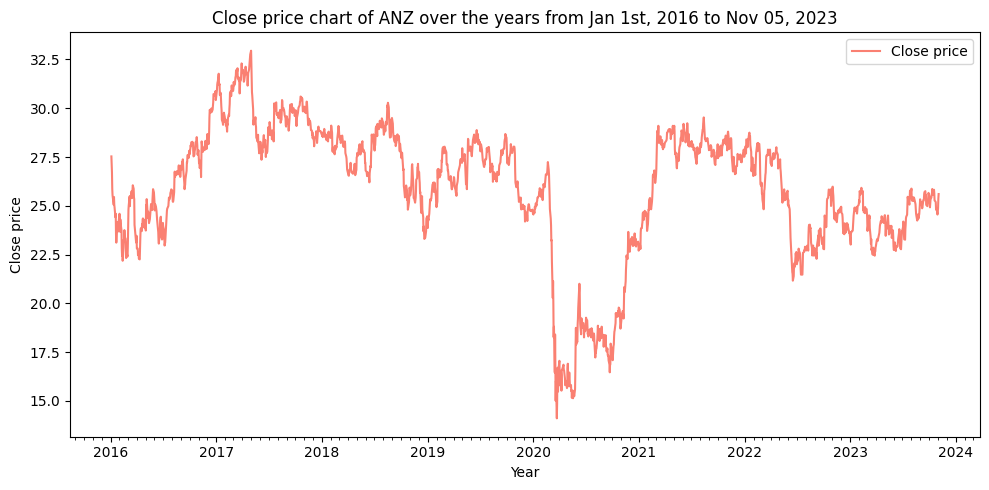

In [ ]:
from matplotlib.dates import YearLocator, DateFormatter, MonthLocator # Add MonthLocator to fix the error

# Convert column "Date" to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')
# Rearrange data in chronological order
df = df.sort_values(by='Date')
# Get year information from the "Date" column
df['Year'] = df['Date'].dt.year
# Create a graph of closing prices over the years
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Close'], label='Close price', color='salmon')
plt.xlabel('Year')
plt.ylabel('Close price')
plt.title('Close price chart of ANZ over the years from Jan 1st, 2016 to Nov 05, 2023')
plt.legend(loc='best')
# Graph format displays dates by year-month
years = YearLocator()
yearsFmt = DateFormatter('%Y')
months = MonthLocator() # Add this line to declare MonthLocator
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(yearsFmt)
plt.gca().xaxis.set_minor_locator(months)

plt.tight_layout()
plt.show()

<ipython-input-6-5d1ed6971828>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='YlOrBr')


<Axes: >

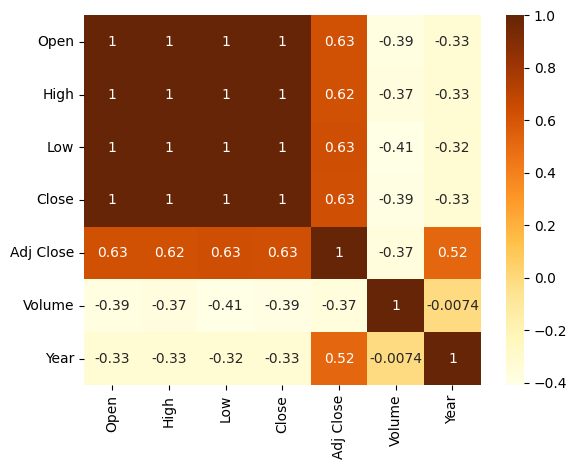

In [ ]:
#check for high corelation
import seaborn as sns
sns.heatmap(df.corr(), annot=True, cmap='YlOrBr')

In [ ]:
df1 = pd.DataFrame(df,columns=['Date','Close'])
df1.index = df1.Date
df1.drop('Date',axis=1,inplace=True)
#split data set
data = df1.values
train_data = data[:1500]
test_data = data[1500:]

sc = MinMaxScaler(feature_range=(0,1))
sc_train = sc.fit_transform(data)

x_train,y_train=[],[]
for i in range(50,len(train_data)):
  x_train.append(sc_train[i-50:i,0])
  y_train.append(sc_train[i,0])

x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
y_train = np.reshape(y_train,(y_train.shape[0],1))

**RNN**

*RNN Model Building*

In [ ]:
# Initialize the RNN model
model= Sequential()
# Add 4 RNN layers with dropout
for _ in range(4):
    model.add(SimpleRNN(units=50, activation='tanh', return_sequences=True if _ < 3 else False))
    model.add(Dropout(0.2))
# Add the output layer
model.add(Dense(units=1))
# Compile the RNN
model.compile(loss='mean_absolute_error',optimizer='adam')
# Fit the RNN to the training set
save_model = "/content/drive/MyDrive/dataset/rnn_Anz.hdf5"
best_model = ModelCheckpoint(save_model,monitor='loss',verbose=2,save_best_only=True,mode='auto')
model.fit(x_train,y_train,epochs=100,batch_size=50,verbose=2,callbacks=[best_model])


Epoch 1/100

Epoch 1: loss improved from inf to 0.58528, saving model to /content/drive/MyDrive/dataset/rnn_Anz.hdf5
29/29 - 8s - loss: 0.5853 - 8s/epoch - 276ms/step
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: loss improved from 0.58528 to 0.48862, saving model to /content/drive/MyDrive/dataset/rnn_Anz.hdf5
29/29 - 1s - loss: 0.4886 - 1s/epoch - 52ms/step
Epoch 3/100

Epoch 3: loss improved from 0.48862 to 0.39376, saving model to /content/drive/MyDrive/dataset/rnn_Anz.hdf5
29/29 - 2s - loss: 0.3938 - 2s/epoch - 54ms/step
Epoch 4/100

Epoch 4: loss improved from 0.39376 to 0.37464, saving model to /content/drive/MyDrive/dataset/rnn_Anz.hdf5
29/29 - 1s - loss: 0.3746 - 1s/epoch - 51ms/step
Epoch 5/100

Epoch 5: loss improved from 0.37464 to 0.34776, saving model to /content/drive/MyDrive/dataset/rnn_Anz.hdf5
29/29 - 1s - loss: 0.3478 - 1s/epoch - 50ms/step
Epoch 6/100

Epoch 6: loss improved from 0.34776 to 0.31140, saving model to /content/drive/MyDrive/dataset/rnn_Anz.hdf5
29/29 - 3s - loss: 0.3114 - 3s/epoch - 101ms/step
Epoch 7/100

Epoch 7: loss improved from 0.31140 to 0.27749, saving model to /content/drive/MyDrive/dataset/rnn_Anz.hdf5
29/29 - 1s - loss: 0.2775 - 1s/epoch - 4

*RNN Prediction*

16/16 [==============================] - 1s 27ms/step


<ipython-input-9-634cfd708a6c>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data1['Prediction'] = y_train_predict_rnn
<ipython-input-9-634cfd708a6c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1['Prediction'] = y_test_predict_rnn


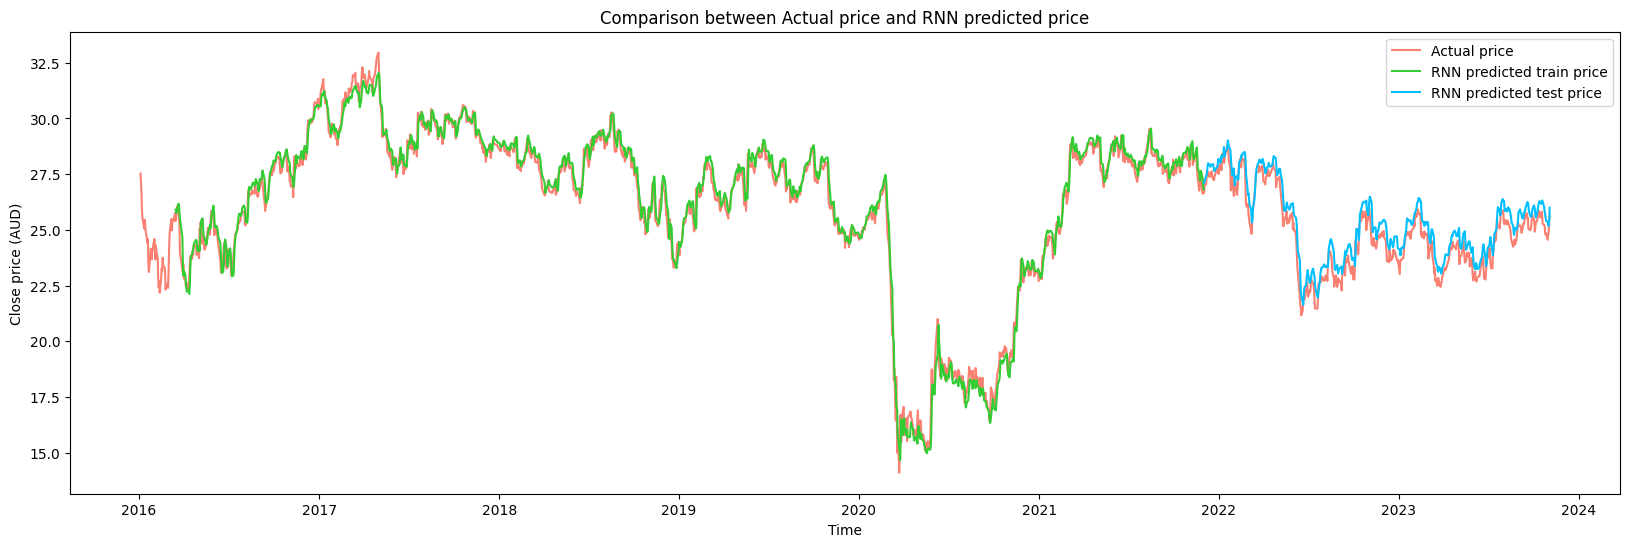

In [ ]:
#data train
y_train_rnn = sc.inverse_transform(y_train) #actual price
final_model_rnn = load_model("/content/drive/MyDrive/dataset/rnn_Anz.hdf5")
y_train_predict_rnn = model.predict(x_train) #predict the closing price on the trained set
y_train_predict_rnn = sc.inverse_transform(y_train_predict_rnn) #predicted price

#reuse model
test_rnn = df1[len(train_data)-50:].values
test_rnn = test_rnn.reshape(-1,1)
sc_test_rnn = sc.transform(test_rnn)

x_test_rnn = []
for i in range(50,test_rnn.shape[0]):
  x_test_rnn.append(sc_test_rnn[i-50:i,0])
x_test_rnn = np.array(x_test_rnn)
x_test_rnn = np.reshape(x_test_rnn,(x_test_rnn.shape[0],x_test_rnn.shape[1],1))

#data test
y_test_rnn = data[1500:] #actual price
y_test_predict_rnn = final_model_rnn.predict(x_test_rnn)
y_test_predict_rnn = sc.inverse_transform(y_test_predict_rnn)

#Comparison chart
train_data1 = df1[50:1500]
test_data1 = df1[1500:]

plt.figure(figsize=(20,6))
plt.plot(df1,label='Actual price',color='salmon')
train_data1['Prediction'] = y_train_predict_rnn
plt.plot(train_data1['Prediction'],label='RNN predicted train price',color='limegreen')
test_data1['Prediction'] = y_test_predict_rnn
plt.plot(test_data1['Prediction'],label='RNN predicted test price',color='deepskyblue')
plt.title('Comparison between Actual price and RNN predicted price')
plt.xlabel('Time')
plt.ylabel('Close price (AUD)')
plt.legend()
plt.show()

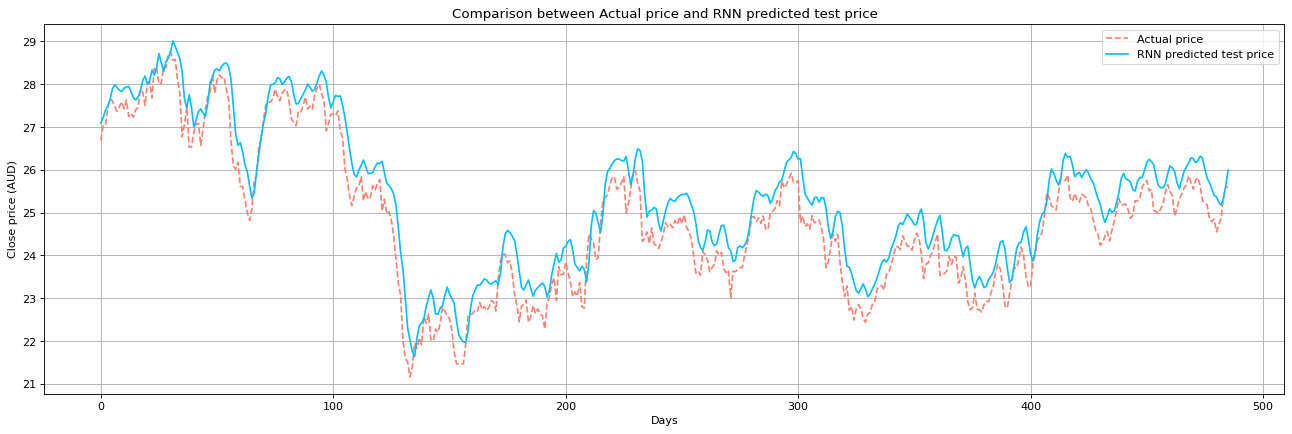

In [ ]:
plt.figure(figsize=(20,6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test_data,color="salmon",linestyle= "dashed",label="Actual price")
plt.plot(y_test_predict_rnn,color="deepskyblue",label="RNN predicted test price")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Close price (AUD)")
plt.title('Comparison between Actual price and RNN predicted test price')
plt.grid(True)
plt.show()

*RNN Model Evaluation*

In [ ]:
#Trainning
#r2
print('Train set fitness:',r2_score(y_train_rnn,y_train_predict_rnn))
#mean_absolute_error
print('Average absolute error on the train set (AUD):',mean_absolute_error(y_train_rnn,y_train_predict_rnn))
#mean_absolute_percentage_error
print('Mean absolute error percentage of train set:',mean_absolute_percentage_error(y_train_rnn,y_train_predict_rnn))

#Testing
#r2
print('Test set coverage:',r2_score(y_test_rnn,y_test_predict_rnn))
#mean_absolute_error
print('Average absolute error on test set (AUD):',mean_absolute_error(y_test_rnn,y_test_predict_rnn))
#mean_absolute_percentage_error
print('Mean absolute error percentage of test set:',mean_absolute_percentage_error(y_test_rnn,y_test_predict_rnn))

Train set fitness: 0.9853530101705438
Average absolute error on the train set (AUD): 0.33793081531624636
Mean absolute error percentage of train set: 0.013652402072117598
Test set coverage: 0.8591466056190502
Average absolute error on test set (AUD): 0.5471893834931801
Mean absolute error percentage of test set: 0.022393091909026604


In [ ]:
rmse = np.sqrt(np.mean(((y_test_predict_rnn - y_test_rnn) ** 2)))
print("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 0.6379998684500358


**LSTM**

*LSTM model buiding*

In [ ]:
#model building
model = Sequential() #create network layer for input data
#2 LSTM class
model.add(LSTM(units=128,input_shape=(x_train.shape[1],1),return_sequences=True))
model.add(LSTM(units=64))
model.add(Dropout(0.5)) #remove some units to avoid overfitting
model.add(Dense(1)) #output 1-way output
#measure mean absolute error using adam optimizer
model.compile(loss='mean_absolute_error',optimizer='adam')
#train model
save_model = "/content/drive/MyDrive/dataset/lstm_Anz.hdf5"
best_model = ModelCheckpoint(save_model,monitor='loss',verbose=2,save_best_only=True,mode='auto')
model.fit(x_train,y_train,epochs=100,batch_size=50,verbose=2,callbacks=[best_model])


Epoch 1/100

Epoch 1: loss improved from inf to 0.15117, saving model to /content/drive/MyDrive/dataset/lstm_Anz.hdf5
29/29 - 8s - loss: 0.1512 - 8s/epoch - 272ms/step
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: loss improved from 0.15117 to 0.08370, saving model to /content/drive/MyDrive/dataset/lstm_Anz.hdf5
29/29 - 5s - loss: 0.0837 - 5s/epoch - 165ms/step
Epoch 3/100

Epoch 3: loss improved from 0.08370 to 0.07720, saving model to /content/drive/MyDrive/dataset/lstm_Anz.hdf5
29/29 - 3s - loss: 0.0772 - 3s/epoch - 118ms/step
Epoch 4/100

Epoch 4: loss did not improve from 0.07720
29/29 - 4s - loss: 0.0780 - 4s/epoch - 122ms/step
Epoch 5/100

Epoch 5: loss improved from 0.07720 to 0.07678, saving model to /content/drive/MyDrive/dataset/lstm_Anz.hdf5
29/29 - 5s - loss: 0.0768 - 5s/epoch - 167ms/step
Epoch 6/100

Epoch 6: loss did not improve from 0.07678
29/29 - 4s - loss: 0.0773 - 4s/epoch - 125ms/step
Epoch 7/100

Epoch 7: loss improved from 0.07678 to 0.07162, saving model to /content/drive/MyDrive/dataset/lstm_Anz.hdf5
29/29 - 3s - loss: 0.0716 - 3s/epoch - 114ms/step
Epoch 8/100

Epoch 8: loss did not improve from 0.07162
29/29 - 3s - loss: 0.0721 - 3s/epoch - 114ms/step
Epoch 

*LSTM Prediction*

16/16 [==============================] - 1s 30ms/step


<ipython-input-16-5ab1fe162042>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data1['Prediction'] = y_train_predict
<ipython-input-16-5ab1fe162042>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1['Prediction'] = y_test_predict


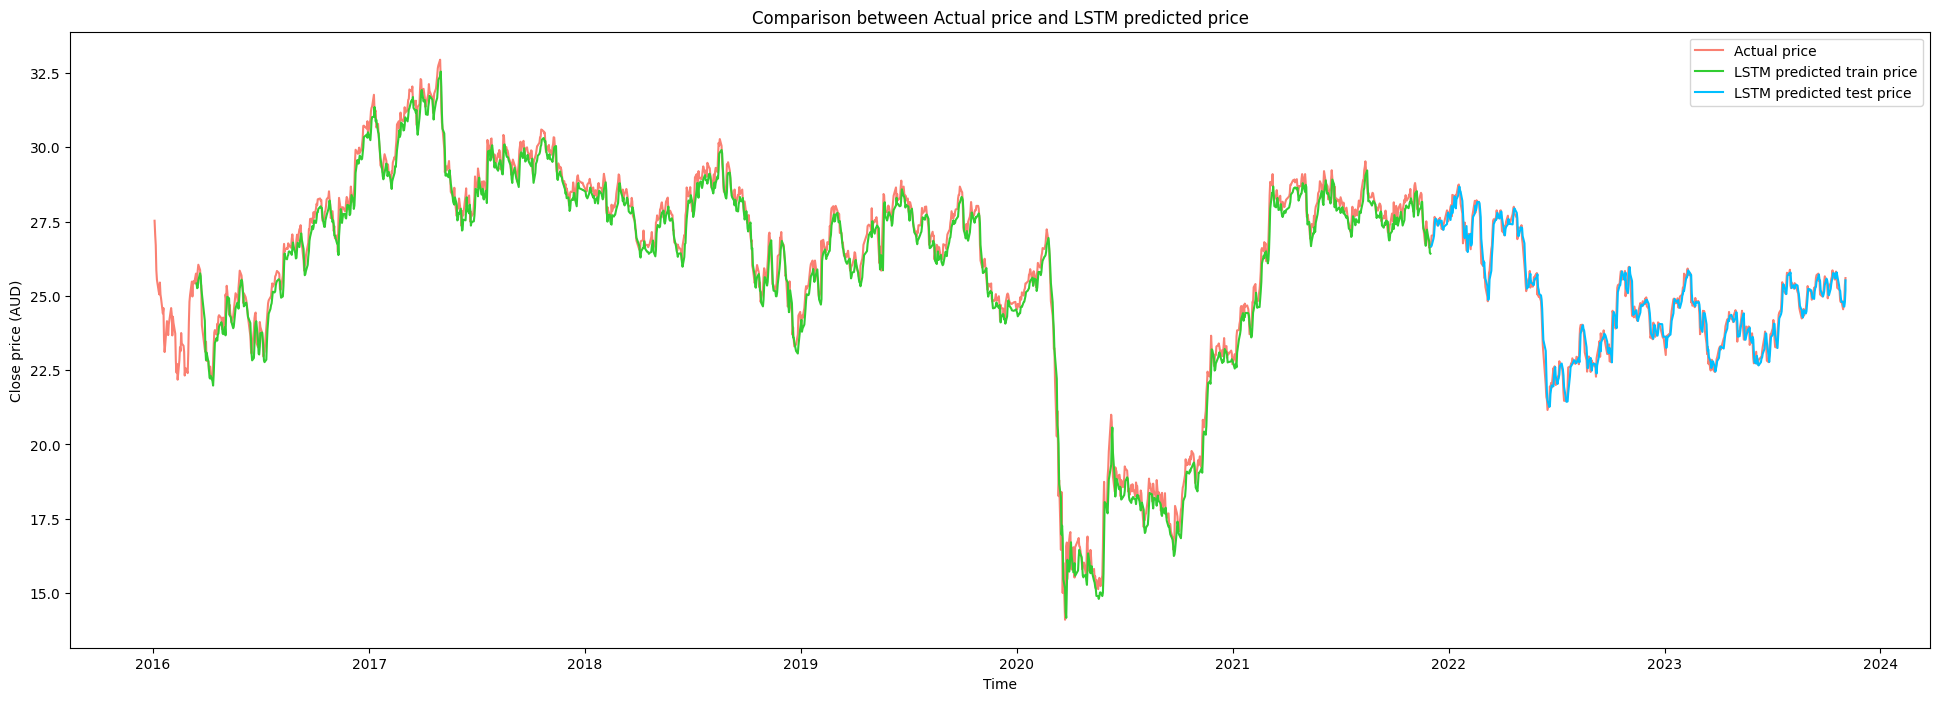

In [ ]:
#data train
y_train = sc.inverse_transform(y_train) #actual price
final_model = load_model("/content/drive/MyDrive/dataset/lstm_Anz.hdf5")
y_train_predict = model.predict(x_train) #predict the closing price on the trained set
y_train_predict = sc.inverse_transform(y_train_predict) #predicted price

#reuse model
test = df1[len(train_data)-50:].values
test = test.reshape(-1,1)
sc_test = sc.transform(test)

x_test = []
for i in range(50,test.shape[0]):
  x_test.append(sc_test[i-50:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

#data test
y_test = data[1500:] #actual price
y_test_predict = final_model.predict(x_test)
y_test_predict = sc.inverse_transform(y_test_predict)

#Comparison chart
train_data1 = df1[50:1500]
test_data1 = df1[1500:]

plt.figure(figsize=(24,8))
plt.plot(df1,label='Actual price',color='salmon')
train_data1['Prediction'] = y_train_predict
plt.plot(train_data1['Prediction'],label='LSTM predicted train price',color='limegreen')
test_data1['Prediction'] = y_test_predict
plt.plot(test_data1['Prediction'],label='LSTM predicted test price',color='deepskyblue')
plt.title('Comparison between Actual price and LSTM predicted price')
plt.xlabel('Time')
plt.ylabel('Close price (AUD)')
plt.legend()
plt.show()

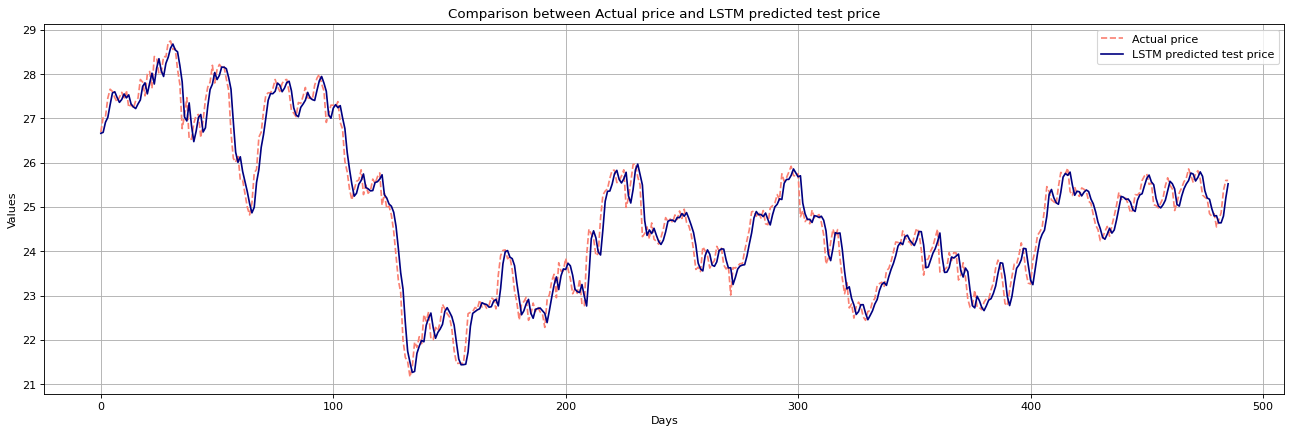

In [ ]:
plt.figure(figsize=(20,6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test_data,color="salmon",linestyle= "dashed", label="Actual price")
plt.plot(y_test_predict,color="navy",label="LSTM predicted test price")
plt.title('Comparison between Actual price and LSTM predicted test price')
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

*LSTM Model Evaluation*

In [ ]:
#Training
#r2
print('Train set fitness:',r2_score(y_train,y_train_predict))
#mean_absolute_error
print('Average absolute error on the train set (AUD):',mean_absolute_error(y_train,y_train_predict))
#mean_absolute_percentage_error
print('Mean absolute error percentage of train set:',mean_absolute_percentage_error(y_train,y_train_predict))

#Testing
#r2
print('Test set coverage:',r2_score(y_test,y_test_predict))
#mean_absolute_error
print('Average absolute error on test set (AUD):',mean_absolute_error(y_test,y_test_predict))
#mean_absolute_percentage_error
print('Mean absolute error percentage of test set:',mean_absolute_percentage_error(y_test,y_test_predict))

Train set fitness: 0.9842919887907932
Average absolute error on the train set (AUD): 0.3654061471910779
Mean absolute error percentage of train set: 0.014679280628002703
Test set coverage: 0.9627304806955513
Average absolute error on test set (AUD): 0.25106544498597444
Mean absolute error percentage of test set: 0.010188458097081896


In [ ]:
rmse = np.sqrt(np.mean(((y_test_predict - y_test) ** 2)))
print("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 0.32818129632574783


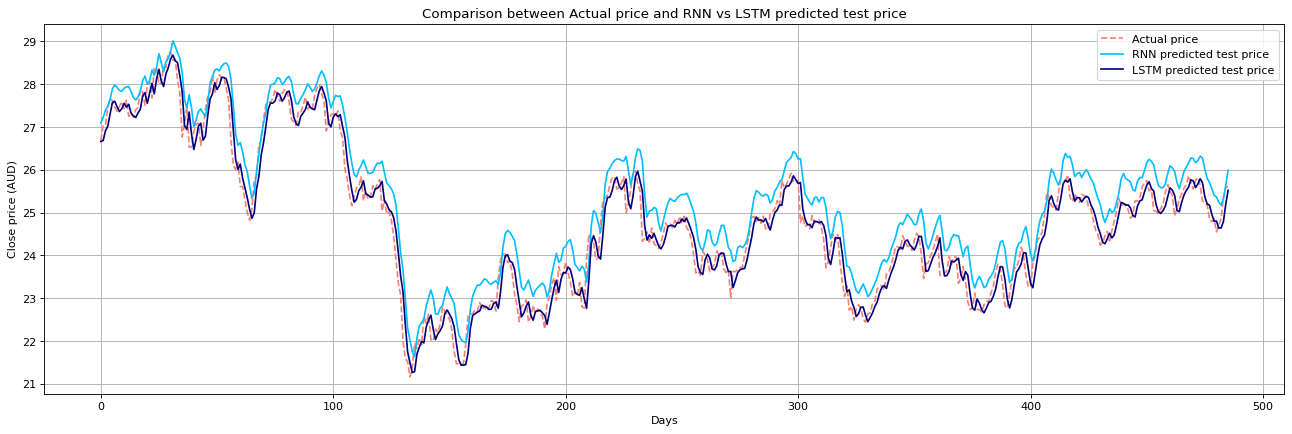

In [ ]:
# Visualization model RNN vs model LSTM

plt.figure(figsize=(20,6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test_data,color="salmon",linestyle= "dashed",label="Actual price")

plt.plot(y_test_predict_rnn,color="deepskyblue",label="RNN predicted test price")
plt.plot(y_test_predict,color="navy",label="LSTM predicted test price")
plt.title('Comparison between Actual price and RNN vs LSTM predicted test price')

plt.legend()
plt.xlabel("Days")
plt.ylabel("Close price (AUD)")
plt.grid(True)
plt.show()
